<a href="https://colab.research.google.com/github/Spandana2704/ML/blob/main/ML3(W2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("/content/games.csv") #loading the dataset
df.shape

(20058, 16)

In [33]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [34]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [35]:
df['winner'].value_counts()

,count
winner,
white,10001
black,9107
draw,950


In [36]:
X= df.drop(labels=['winner'],axis=1) #input variables
y=df['winner'] #output variable

In [37]:
#le=LabelEncoder()
#y=le.fit_transform(y)

In [38]:
X=pd.get_dummies(X,drop_first=True) #encoding the output varaibles to avoid the above error

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [40]:
X.shape

(20058, 59047)

In [41]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

15782

In [42]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [43]:
quasi_constant_feat=[] #to store the names of features that are quasi-constant

for feature in x_train.columns:

  #for every column in x_train it counts how many times a value is repeated and divides it with length of x_train to get a proportion of each value.Next sorting them in descending order and taking the most fequent proportion value as predominant value.
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]

  #checking if predominant value is >0.999 or not. if yes then appending the feature to quasi_constant_feat list
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

42600

In [44]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [47]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)          #set is used because it contains unique values
print(len(dup_features))

3


In [48]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)

In [49]:
x_train.shape

(14040, 662)

<Axes: >

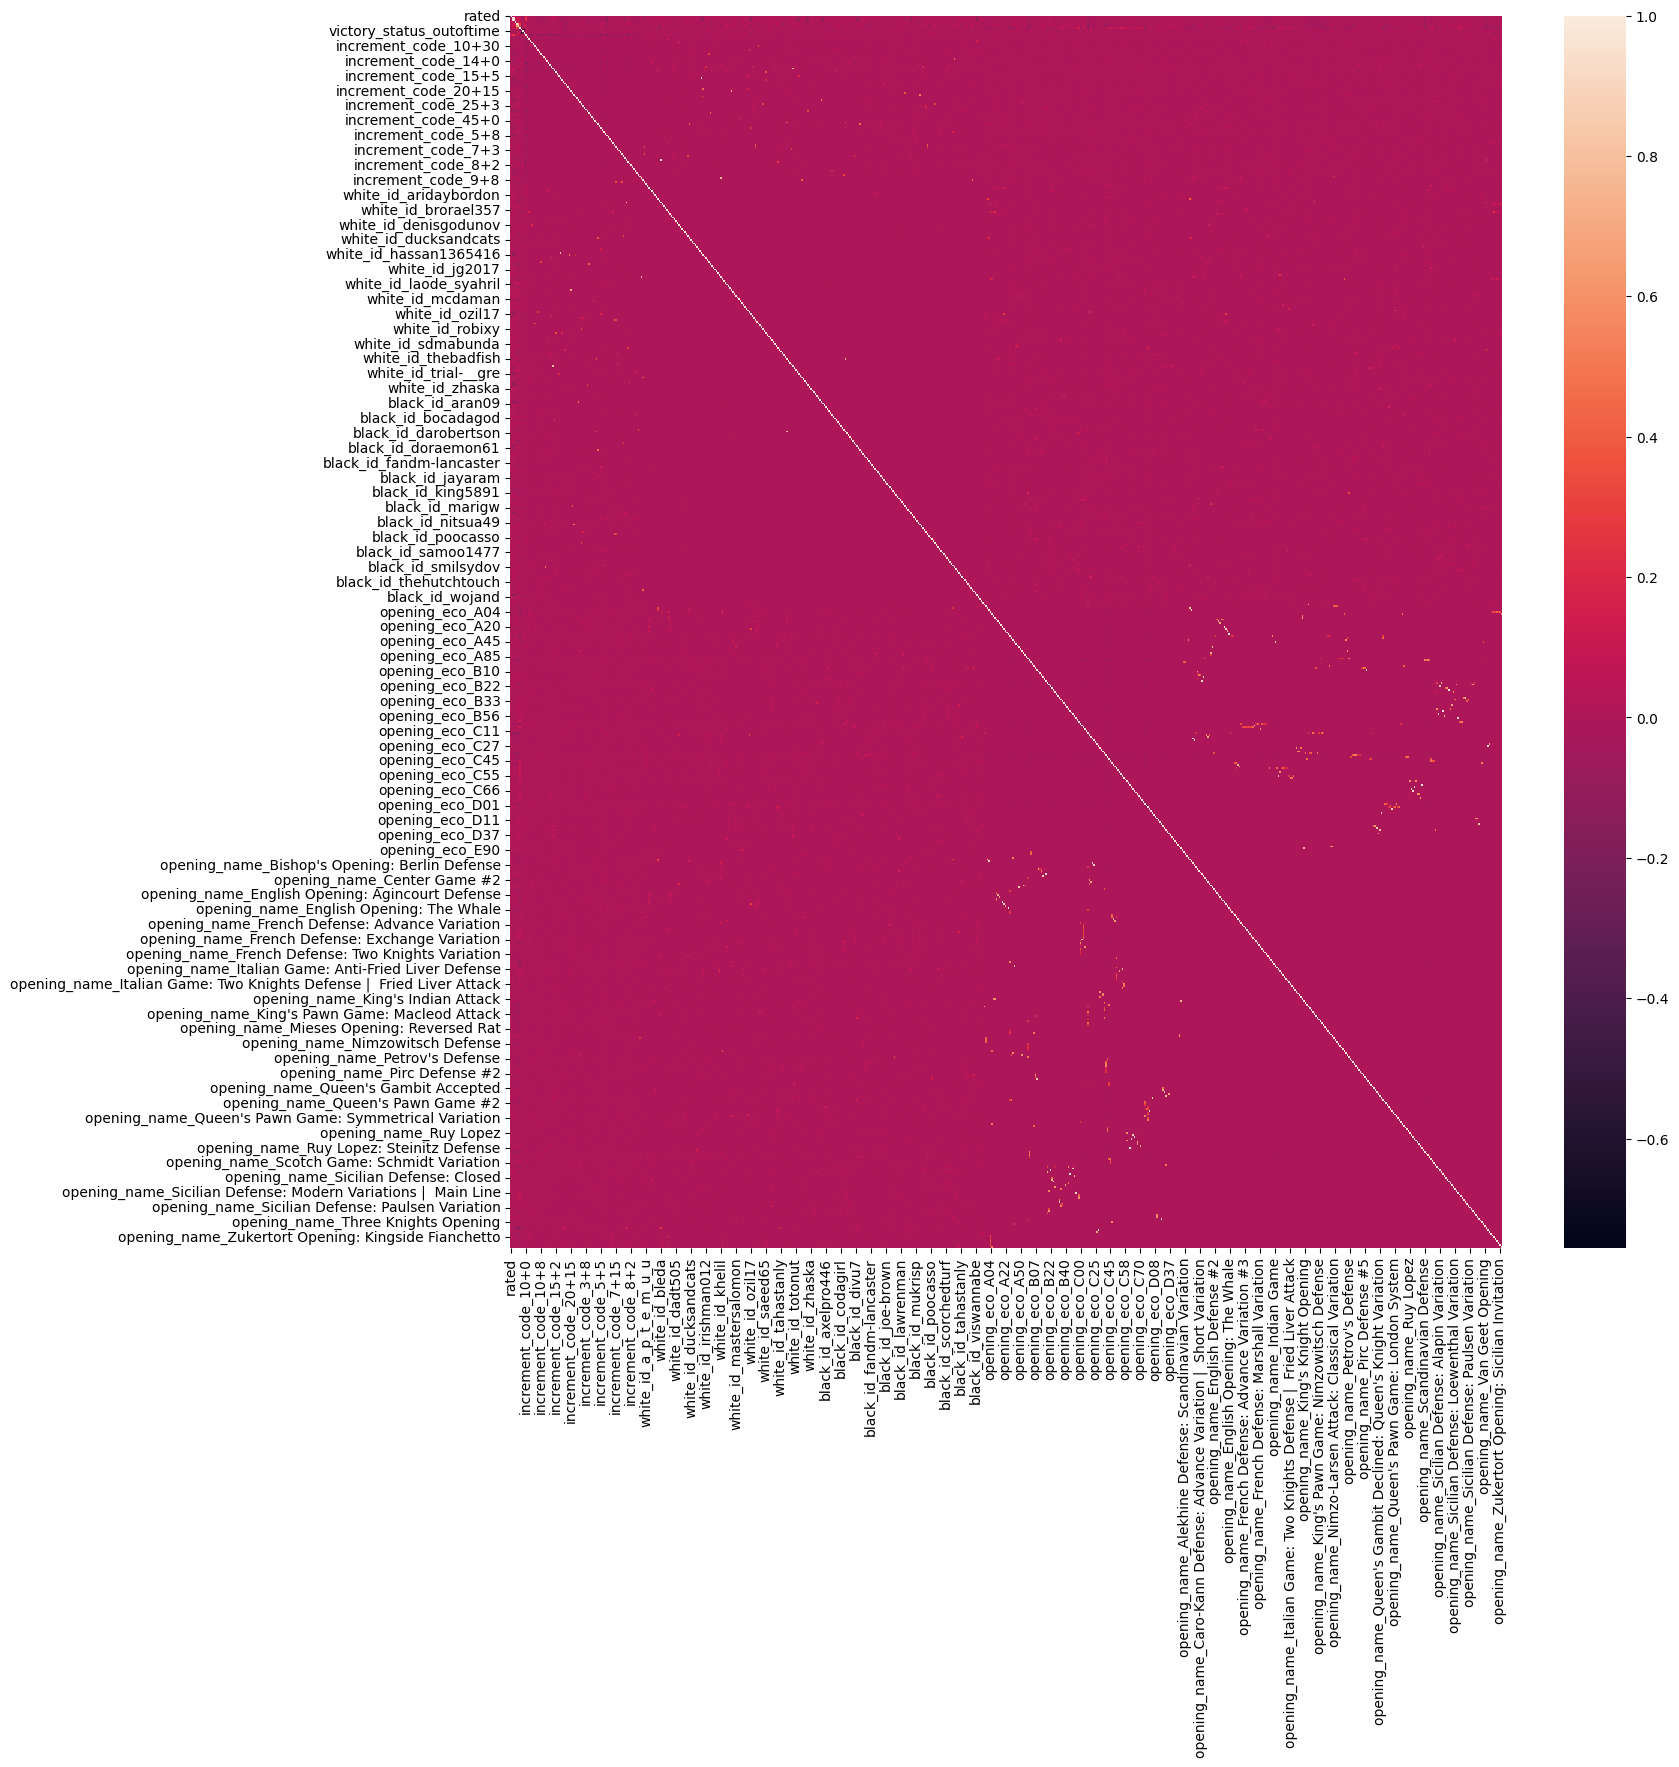

In [52]:
corrmat=x_train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

In [53]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname=corr_matrix.columns[i] #3 getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9) # filter for all the features with corre lation more than 0.9
correlated_features = set(corr_features) # Set statement is used to identify the unique feature in the list
print(len(correlated_features)) # length of set of correlated features

14


In [54]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

In [55]:
x_train.shape

(14040, 648)

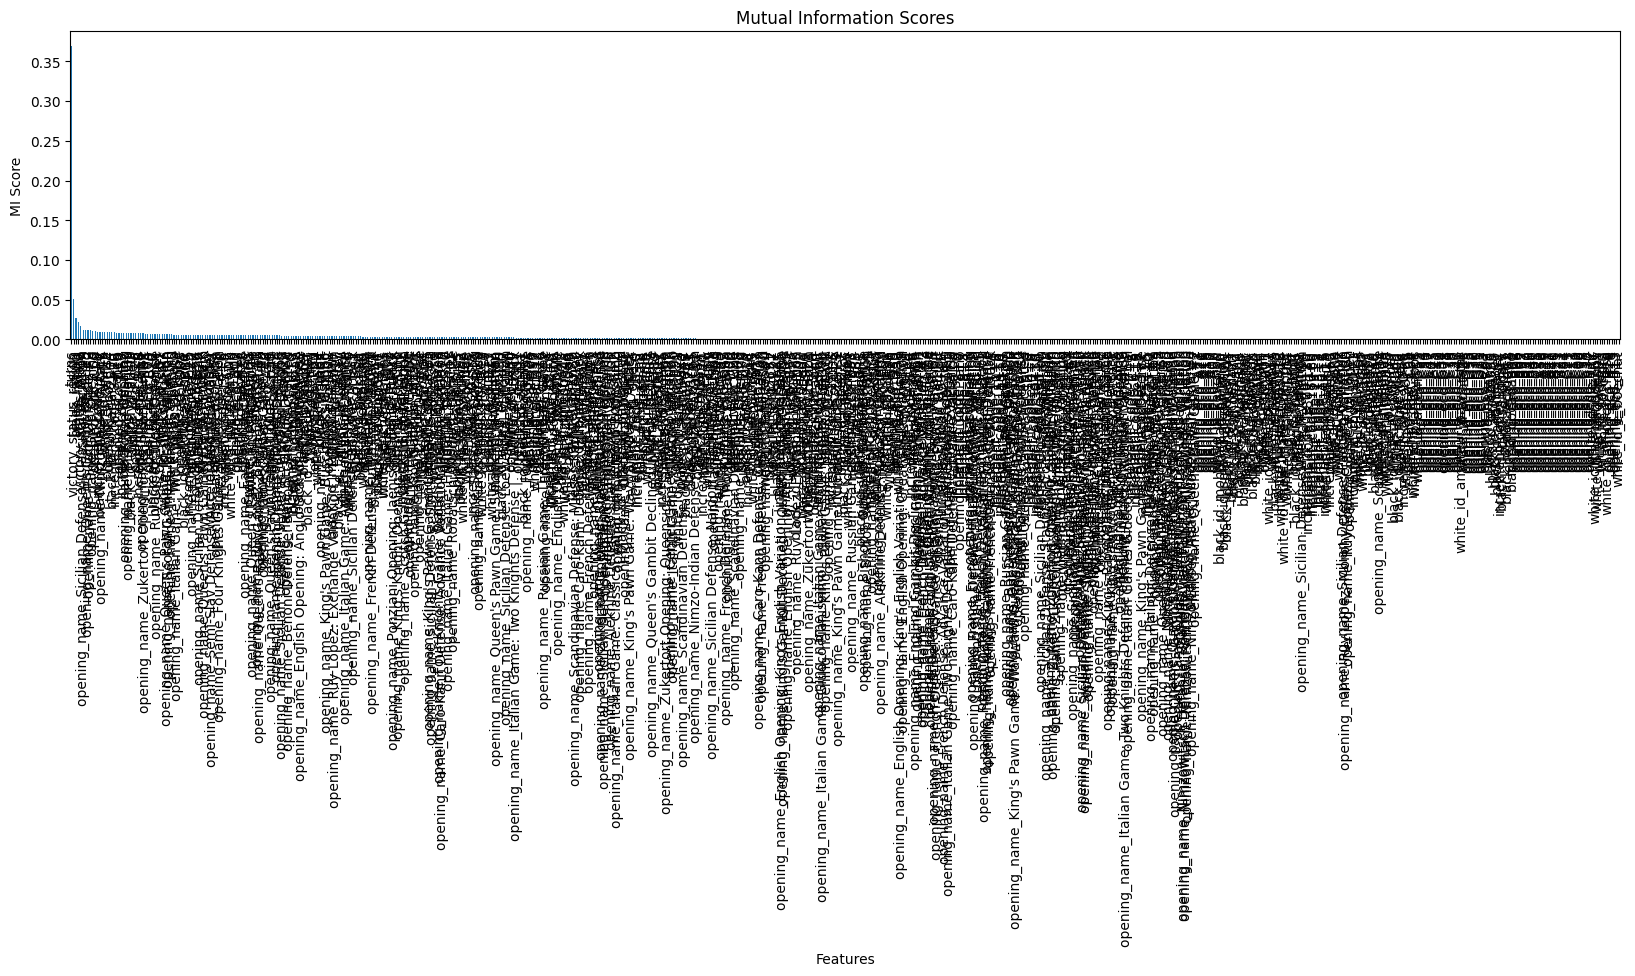

Top 10 Selected Features:
 ['turns', 'white_rating', 'black_rating', 'victory_status_mate', 'victory_status_resign', 'increment_code_10+0', 'black_id_samoo1477', 'opening_eco_D31', 'opening_name_French Defense: Advance Variation |  Milner-Barry Gambit', 'opening_name_Sicilian Defense: McDonnell Attack']


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Step 1: Calculate Mutual Information scores
mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

# Step 2: Visualize MI scores
mi.sort_values(ascending=False).plot.bar(figsize=(20, 4))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

# Step 3: Select top 10 features based on MI
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

# Step 4: Get selected feature names
selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())